# Export Plot to SVG, PDF, HTML, PNG

In [1]:
import io

import numpy as np
import pandas as pd
from wand.image import Image as WImage
from PIL import Image as PImage
from pdf2image import convert_from_path
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

from lets_plot import *

In [2]:
LetsPlot.setup_html()

In [3]:
def svg_to_png(path, scale=2):
    png_path = path.replace(".svg", "_svg.png")
    with WImage(filename=path) as img:
        img.format = 'png'
        img.transform(resize="{pct}%x{pct}%".format(pct=scale * 100))
        img.save(filename=png_path)
    return png_path

In [4]:
def pdf_to_png(path, dpi=300):
    png_path = path.replace(".pdf", "_pdf.png")
    img = convert_from_path(path, dpi=dpi)[0]
    img.save(png_path, "png")
    return png_path

In [5]:
def html_to_svg(html_path, iframe=True, timeout=5):
    svg_path = html_path.replace(".html", "_html.svg")
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    driver = webdriver.Chrome(options=options)
    try:
        driver.get("file://{0}".format(html_path))
        if iframe:
            iframe_element = driver.find_element(By.TAG_NAME, "iframe")
            driver.switch_to.frame(iframe_element)
        svg_html = driver.execute_script("""
            const svg = document.querySelector('svg');
            return svg ? svg.outerHTML : null;
        """)
        if not svg_html:
            raise RuntimeError("SVG not found")
        with open(svg_path, "w", encoding="utf-8") as f:
            f.write(svg_html)
    finally:
        driver.quit()
    return svg_path

In [6]:
def png_to_plot(path, *, w=640, h=480):
    return ggplot() + \
        geom_imshow(image_data=np.asarray(PImage.open(path))) + \
        scale_x_continuous(expand=[0, 0]) + scale_y_continuous(expand=[0, 0]) + \
        ggsize(w, h) + \
        theme_void() + theme(plot_inset=0, plot_margin=0)

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
p = ggplot(df) + geom_point(aes("petal_length", "petal_width", color="species"), size=5) + ggsize(600, 400)
p

## Export Using `ggsave()`

The `ggsave()` function is an easy way to export plot to a file in SVG, PDF, HTML or PNG formats.

### Export SVG to file

In [9]:
fullpath_svg = ggsave(p, "plot.svg")
fullpath_svg_png = svg_to_png(fullpath_svg)

Load and display saved plot.


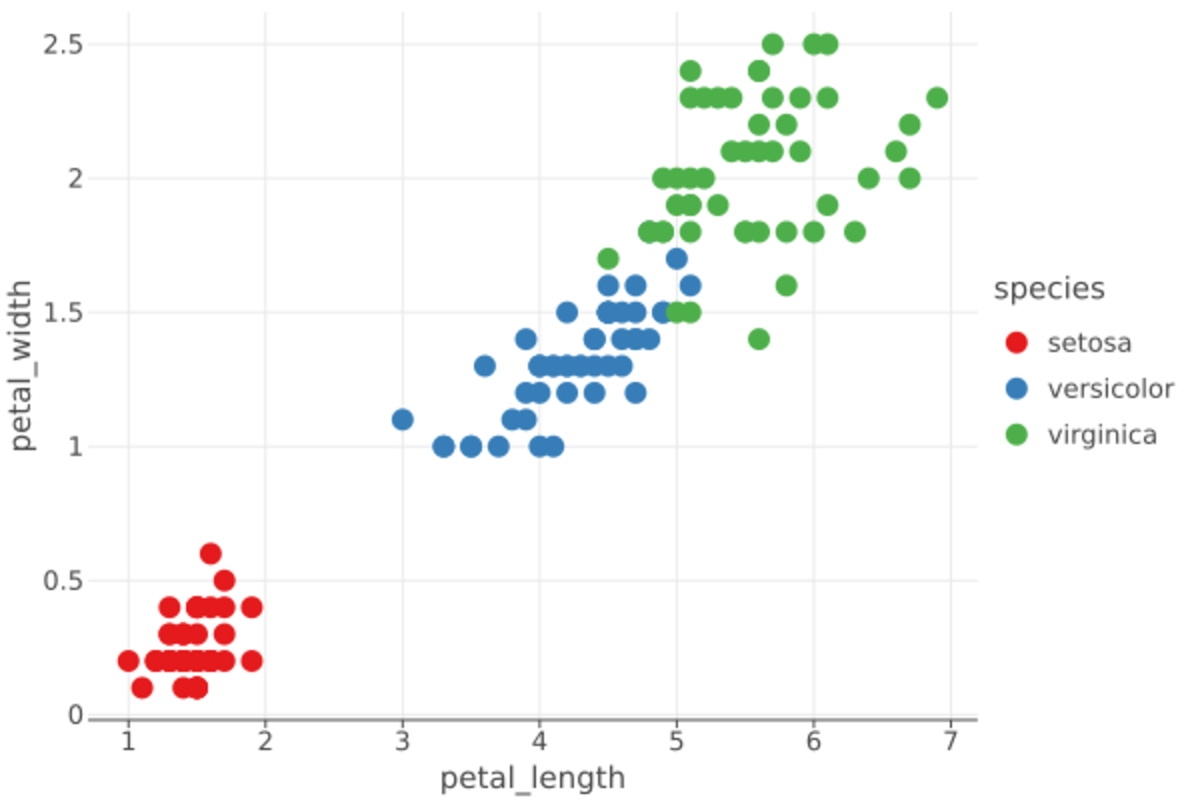

In [10]:
png_to_plot(fullpath_svg_png)

### Export PDF to file

In [11]:
fullpath_pdf = ggsave(p, "plot.pdf")
fullpath_pdf_png = pdf_to_png(fullpath_pdf)

Load and display saved plot.


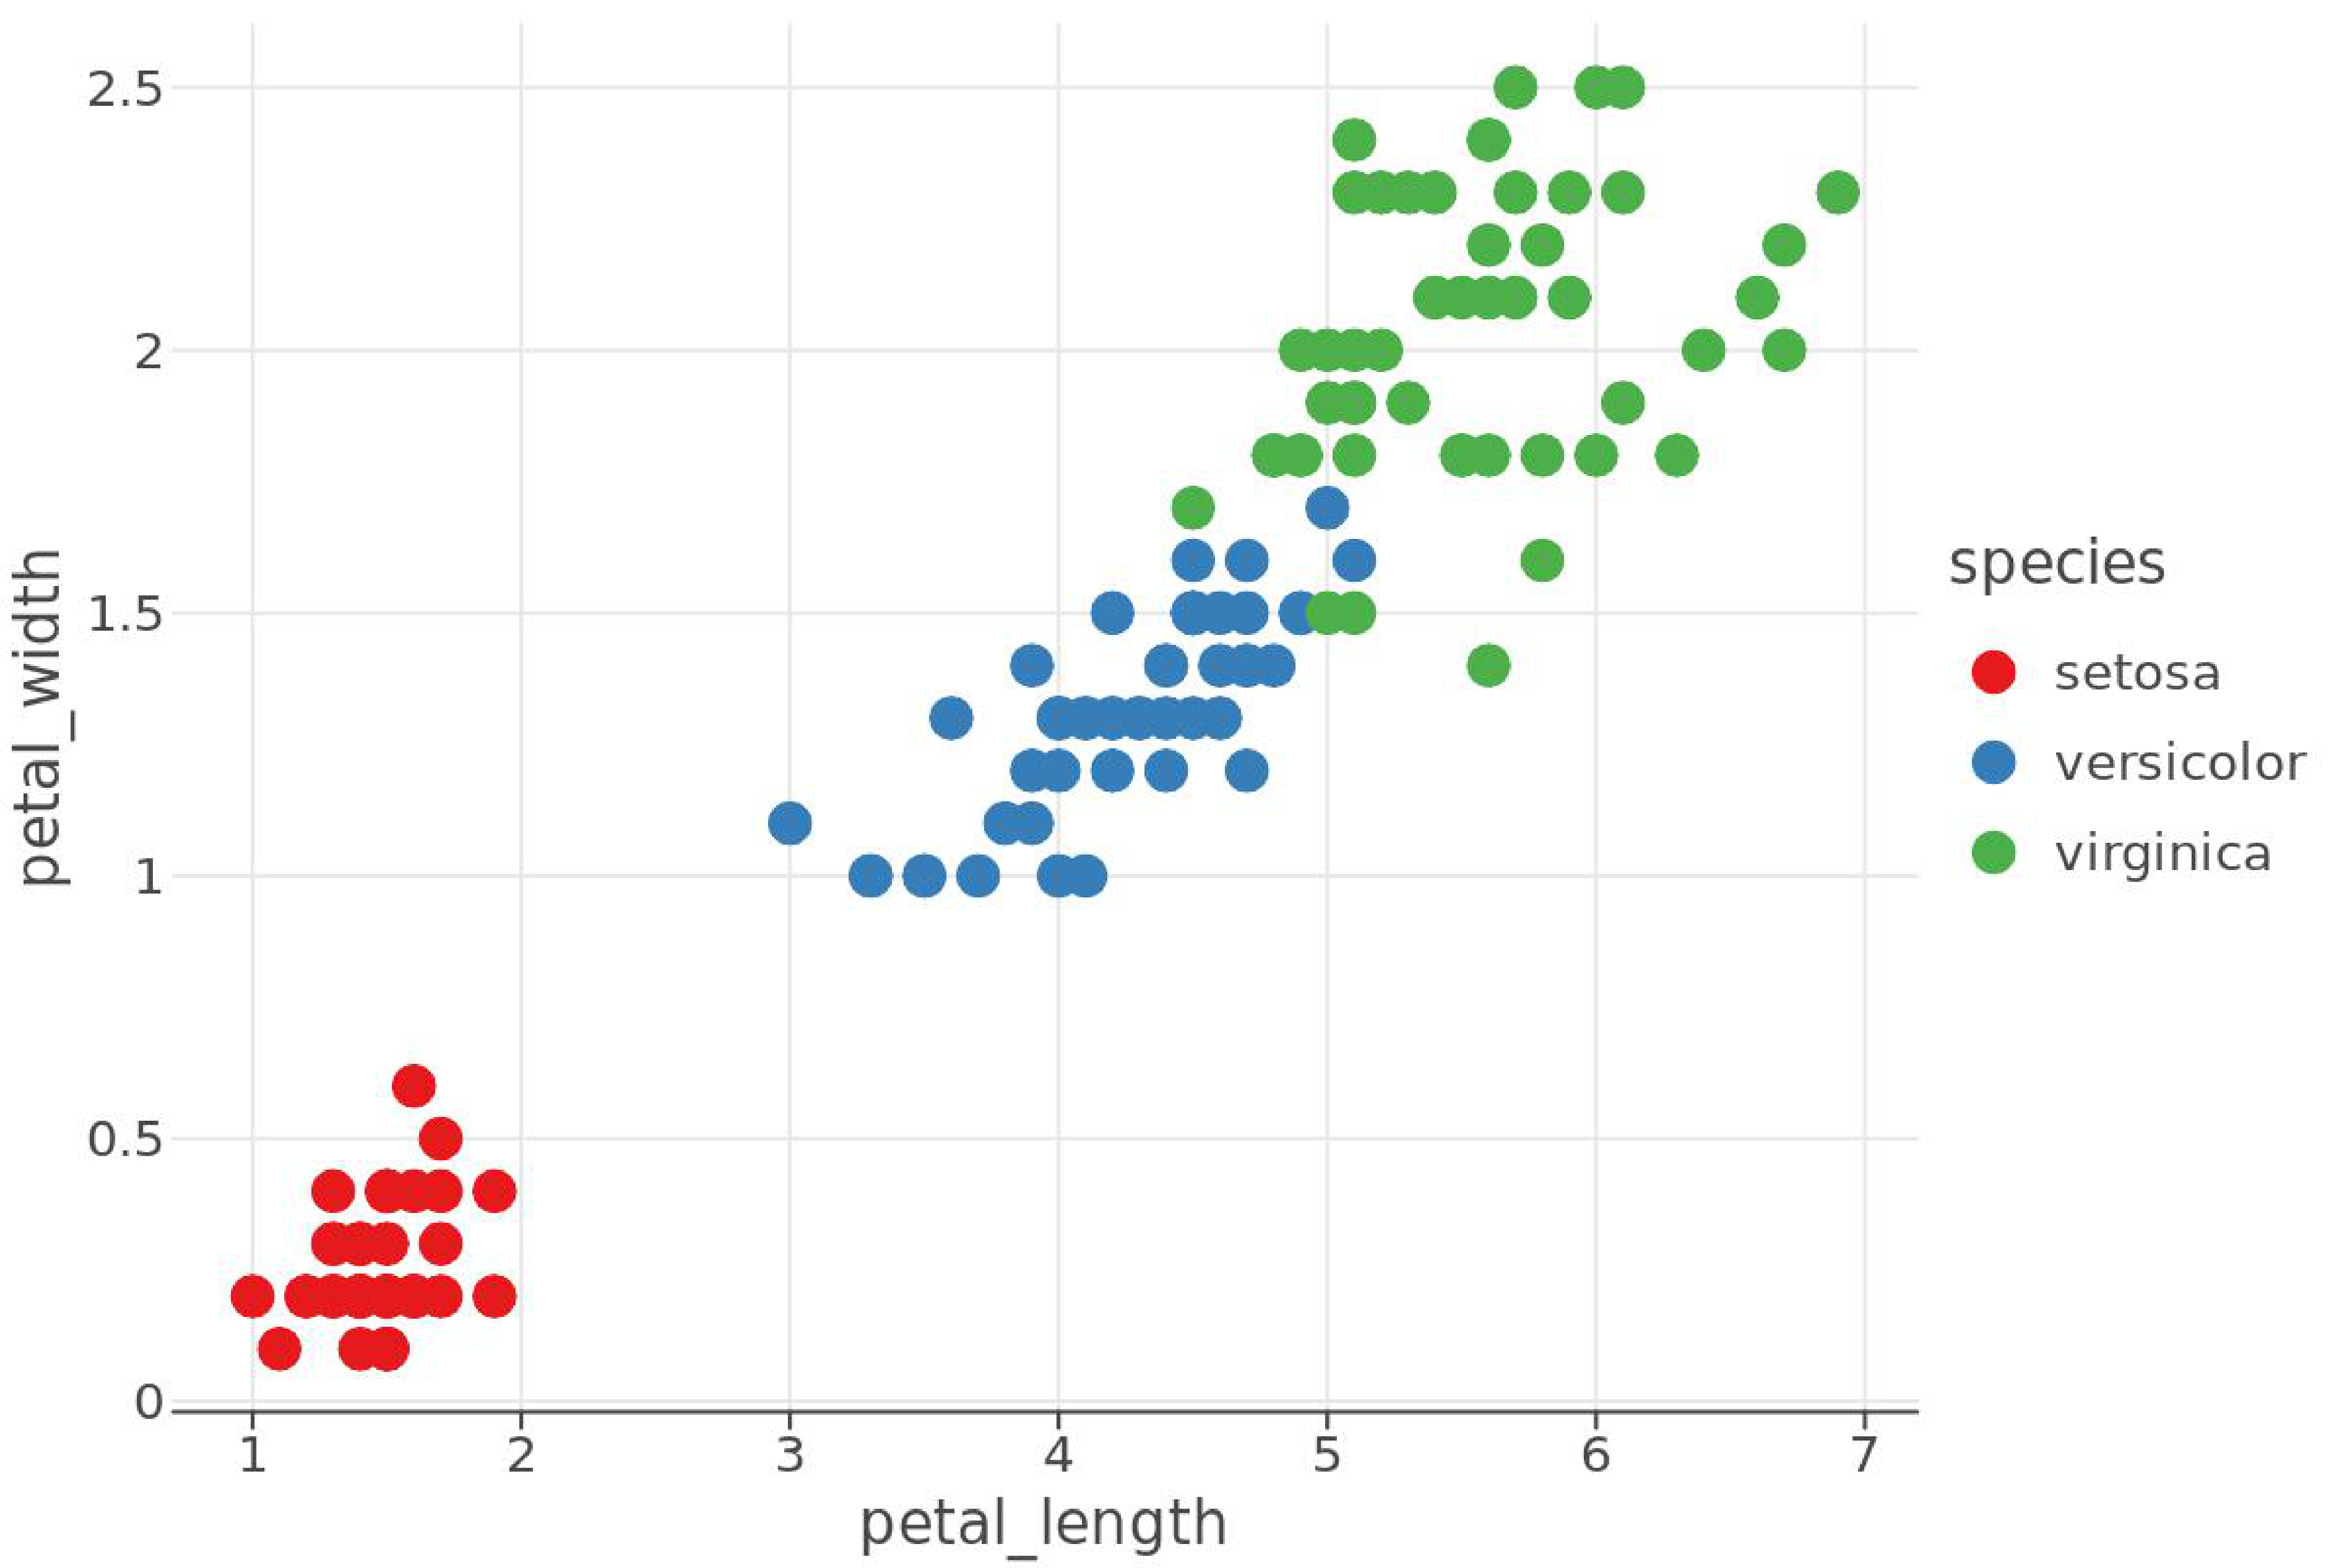

In [12]:
png_to_plot(fullpath_pdf_png)

### Export HTML to file

By default, when exporting HTML, `ggsave` wraps the HTML of the plot in an `iframe` that matches the size of the plot.

In [13]:
fullpath_html = ggsave(p, "plot.html")
fullpath_html_png = svg_to_png(html_to_svg(fullpath_html))

Load and display saved plot.


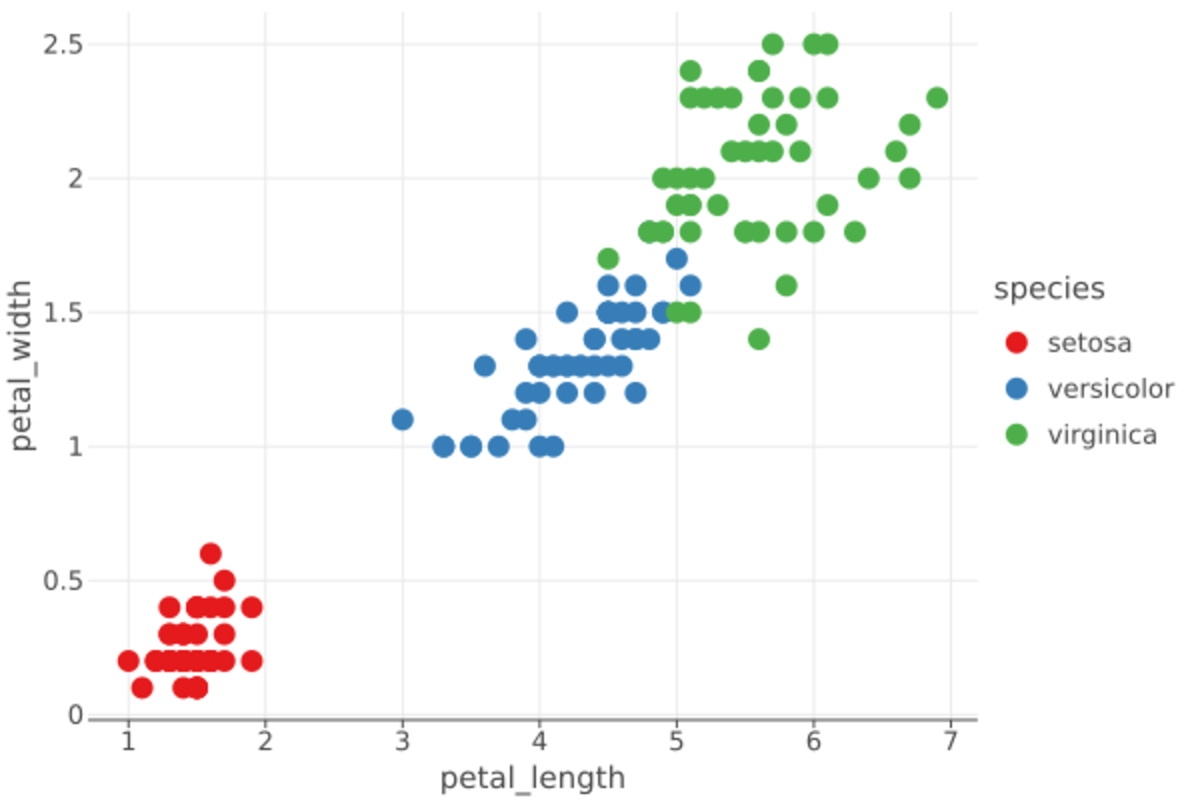

In [14]:
png_to_plot(fullpath_html_png)

Use the `iframe=False` option to only export the HTML of the plot, without adding an `iframe`.

In [15]:
fullpath_no_iframe = ggsave(p, "no_iframe_plot.html", iframe=False)
fullpath_no_iframe_png = svg_to_png(html_to_svg(fullpath_no_iframe, iframe=False))


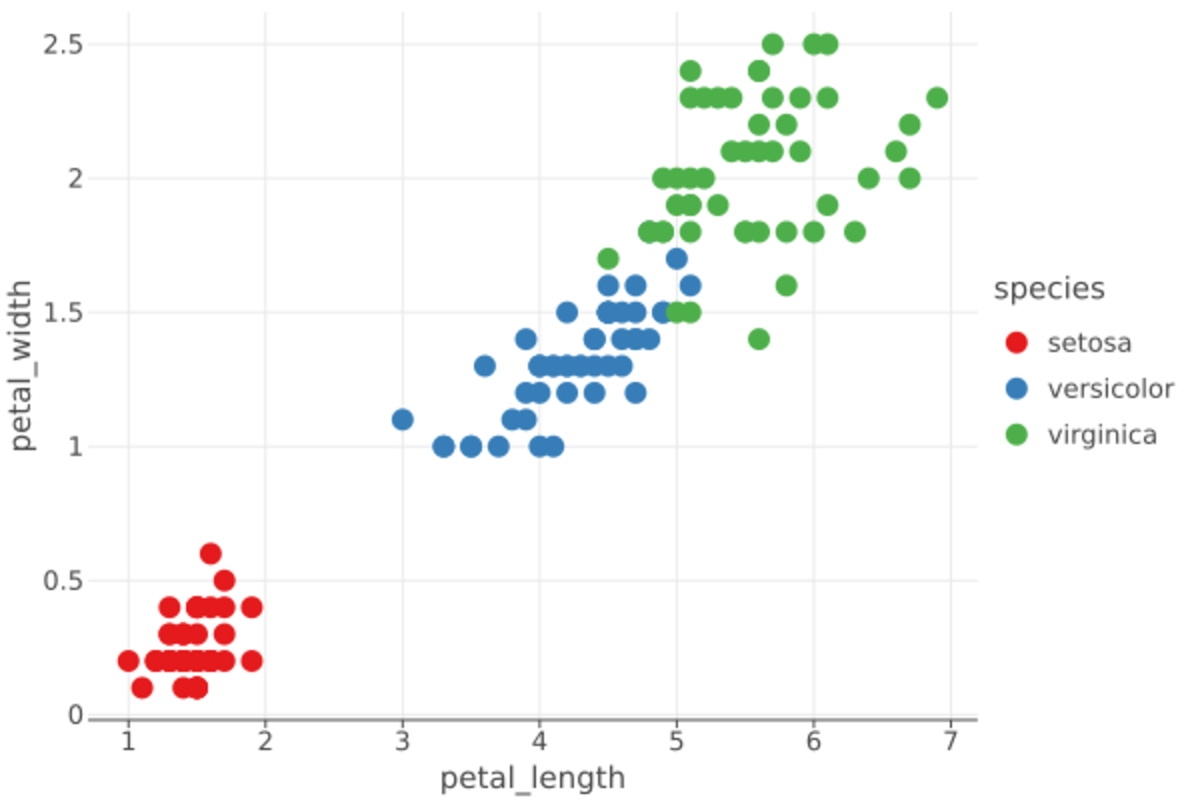

In [16]:
png_to_plot(fullpath_no_iframe_png)

### Export to PNG file

To save plot as a PNG file use a filename that have "png" extension. 

In [17]:
fullpath_png = ggsave(p, "plot.png")

Load and display saved PNG.


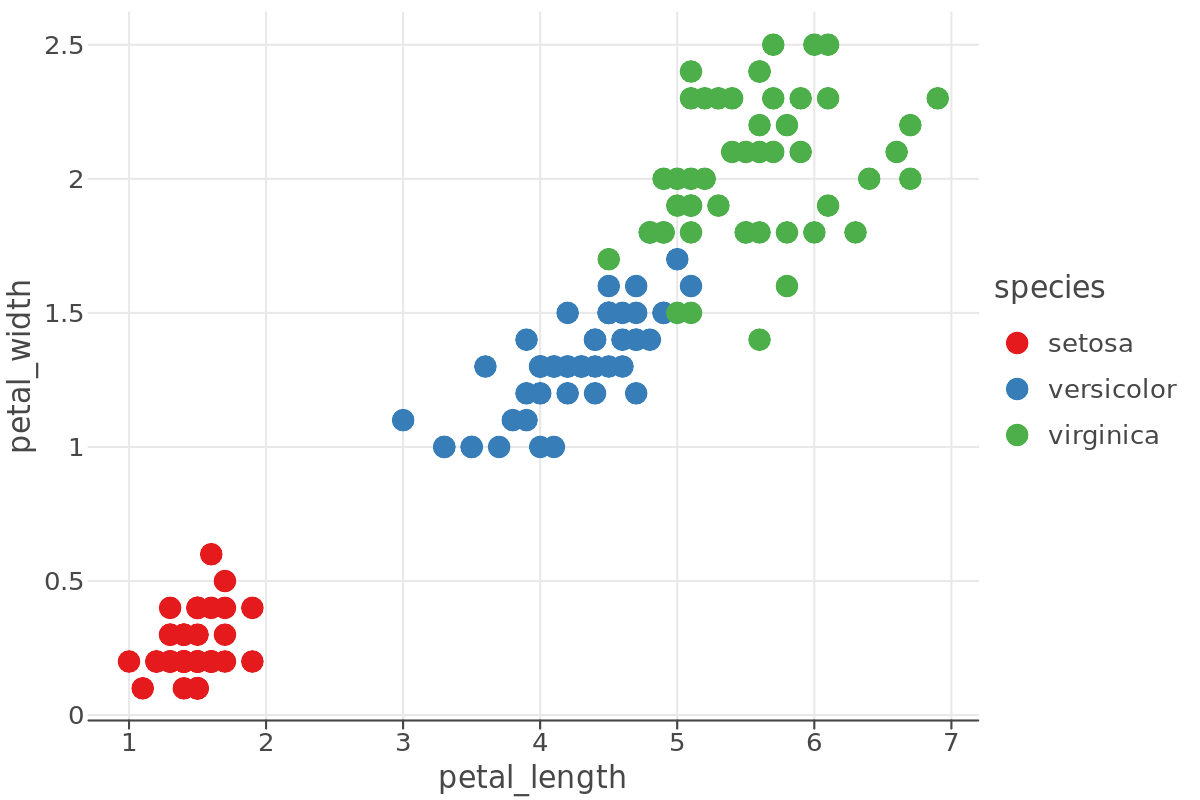

In [18]:
png_to_plot(fullpath_png)

## Export Plot to a File or File-Like Object

### Saving to a File

In [19]:
path = svg_to_png(p.to_svg("lets-plot-images/to_svg_plot.svg"))


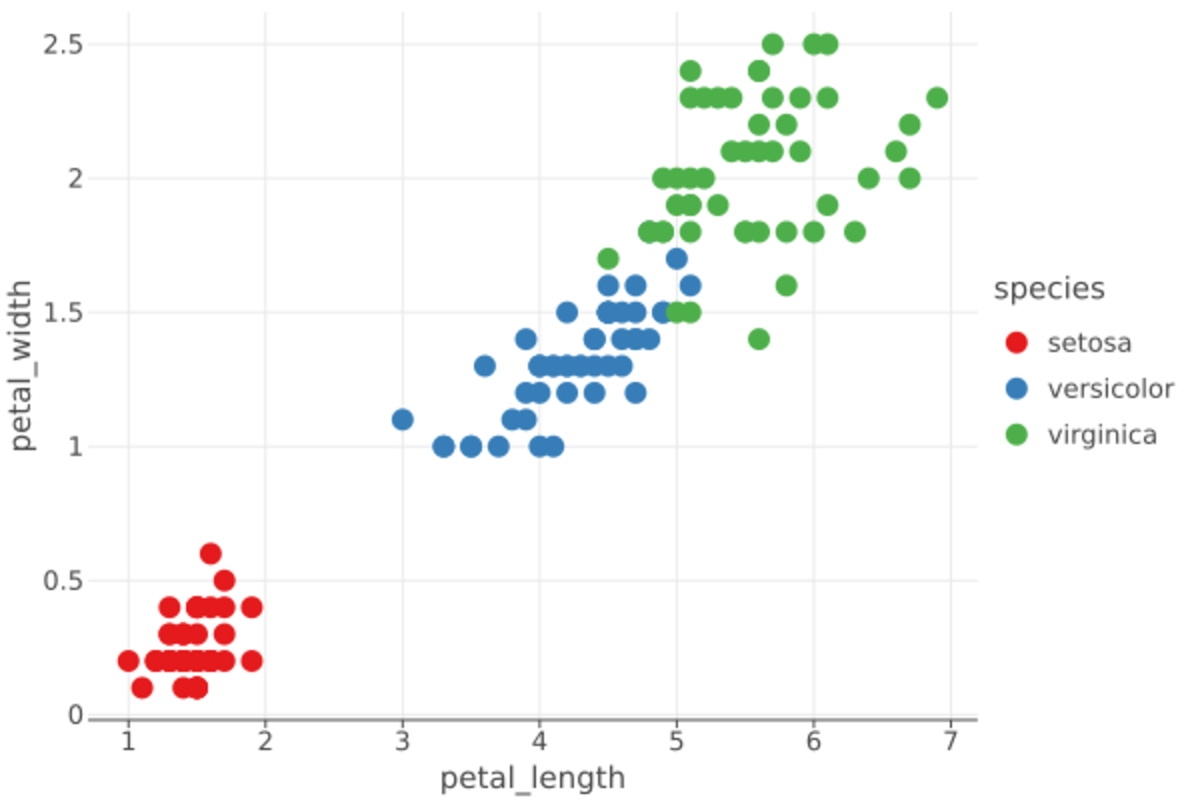

In [20]:
png_to_plot(path)

### Wrighting to a Stream of In-Memory Bytes

In [21]:
stream = io.BytesIO()

p.to_svg(stream)

In [22]:
stream_path = "lets-plot-images/to_svg_stream_plot.png"
with WImage(blob=stream.getvalue()) as img:
    img.format = 'png'
    img.transform(resize="200%x200%")
    img.save(filename=stream_path)


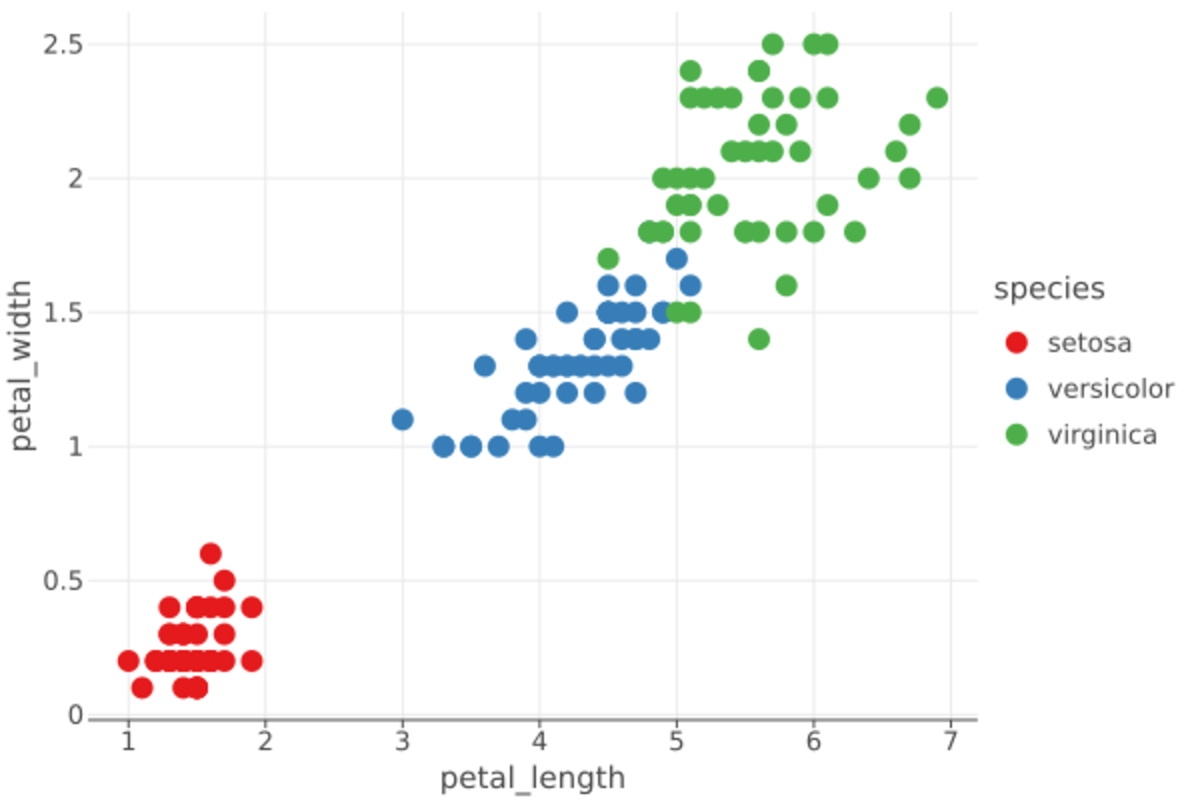

In [23]:
png_to_plot(stream_path)

## Adjusting the Size and Aspect Ratio

### Parameter `scale`


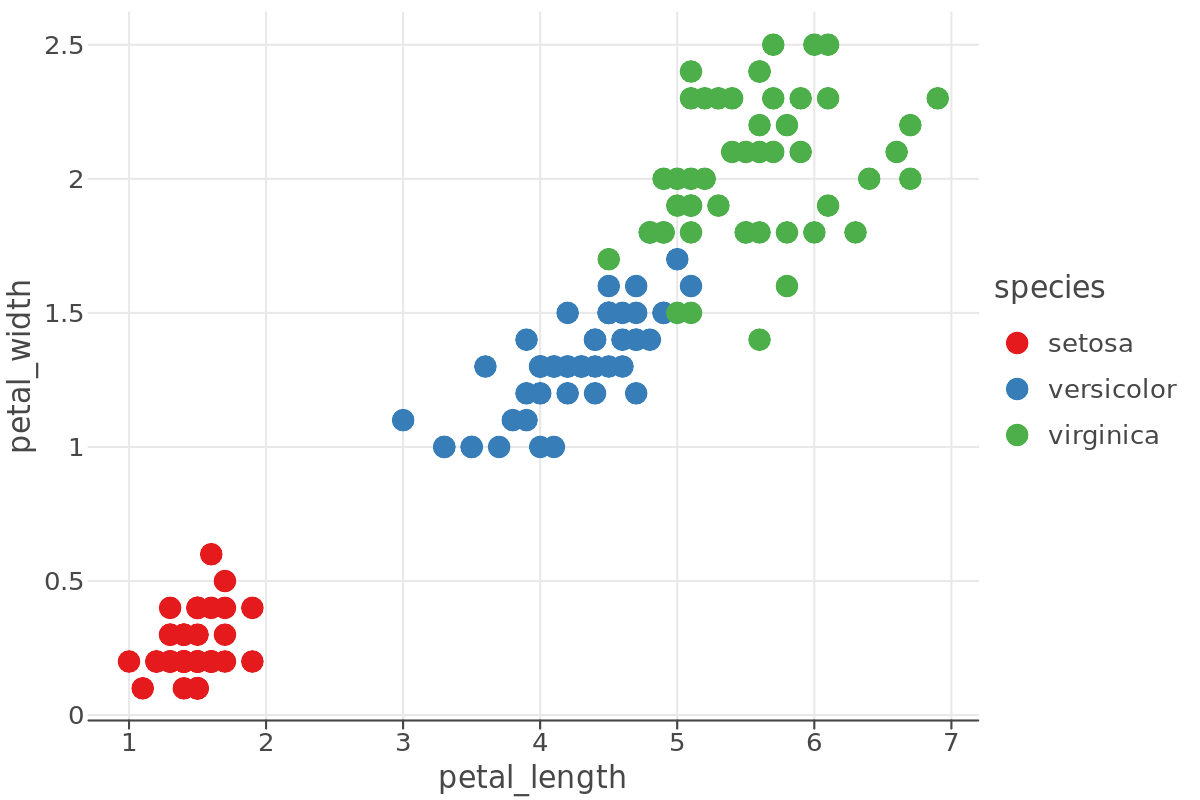

In [24]:
# default scale is 2.0
img_scale_default = ggsave(p, "scale_default_plot.png")
png_to_plot(img_scale_default)


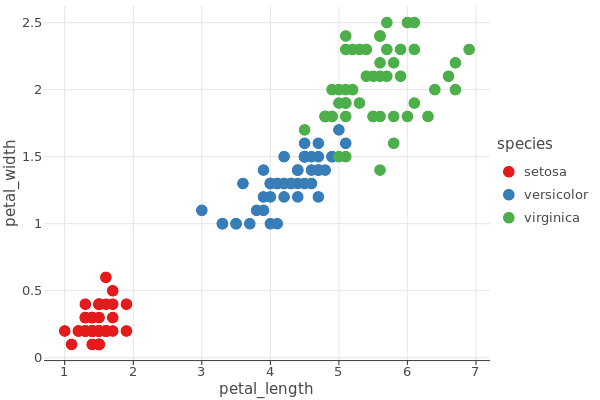

In [25]:
# use custom scale
img_scale_1 = ggsave(p, "scale_1_plot.png", scale=1)
png_to_plot(img_scale_1)

### Parameters `w`, `h`, `unit`, and `dpi`

#### 72 dpi


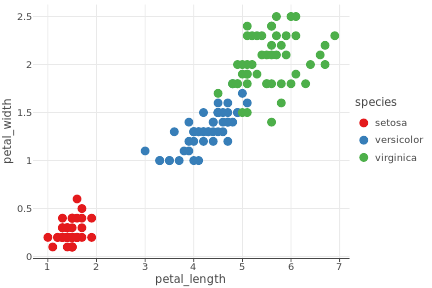

In [26]:
img_72 = ggsave(p, "72dpi_plot.png", w=6, h=4, unit='in', dpi=72)
png_to_plot(img_72, w=900, h=600)

#### 300 dpi


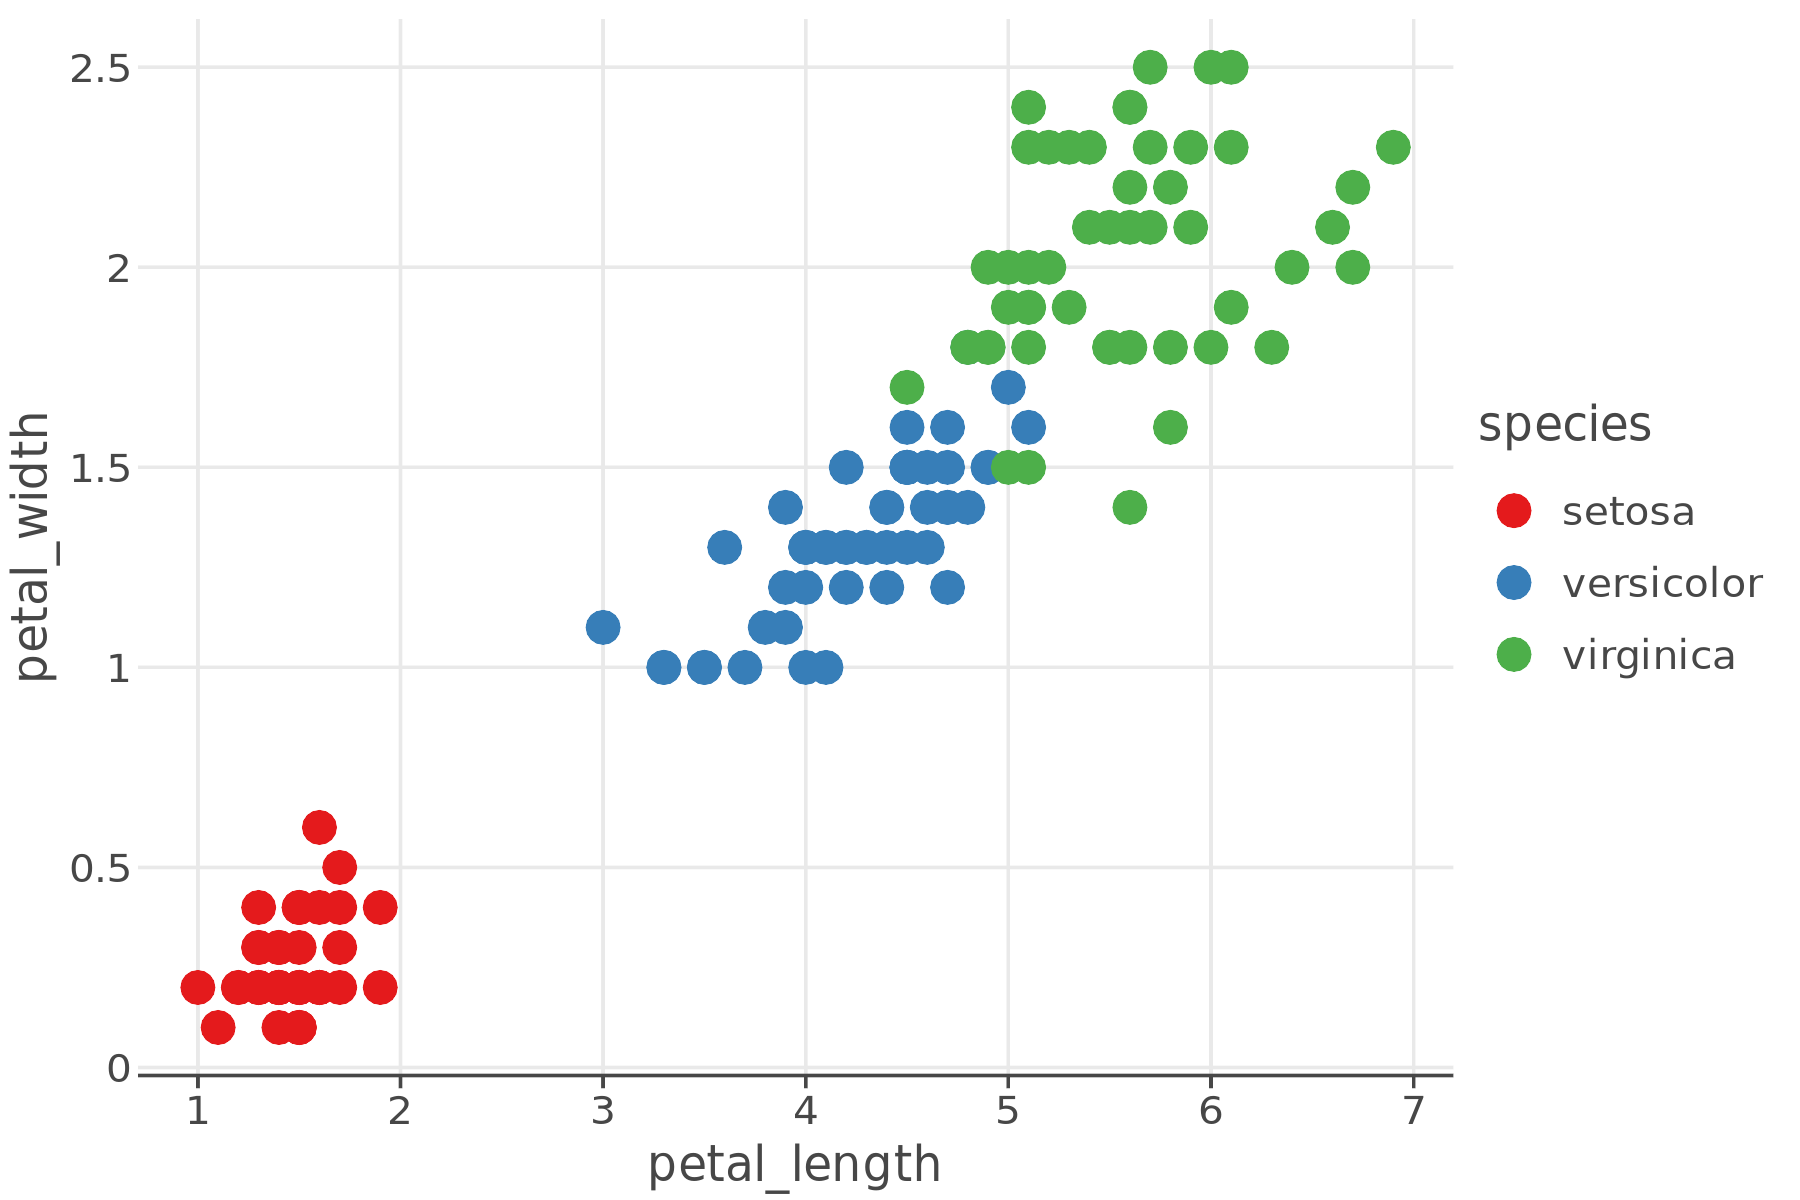

In [27]:
img_300 = ggsave(p, "300dpi_plot.png", w=6, h=4, unit='in', dpi=300)
png_to_plot(img_300, w=900, h=600)

## Regressions


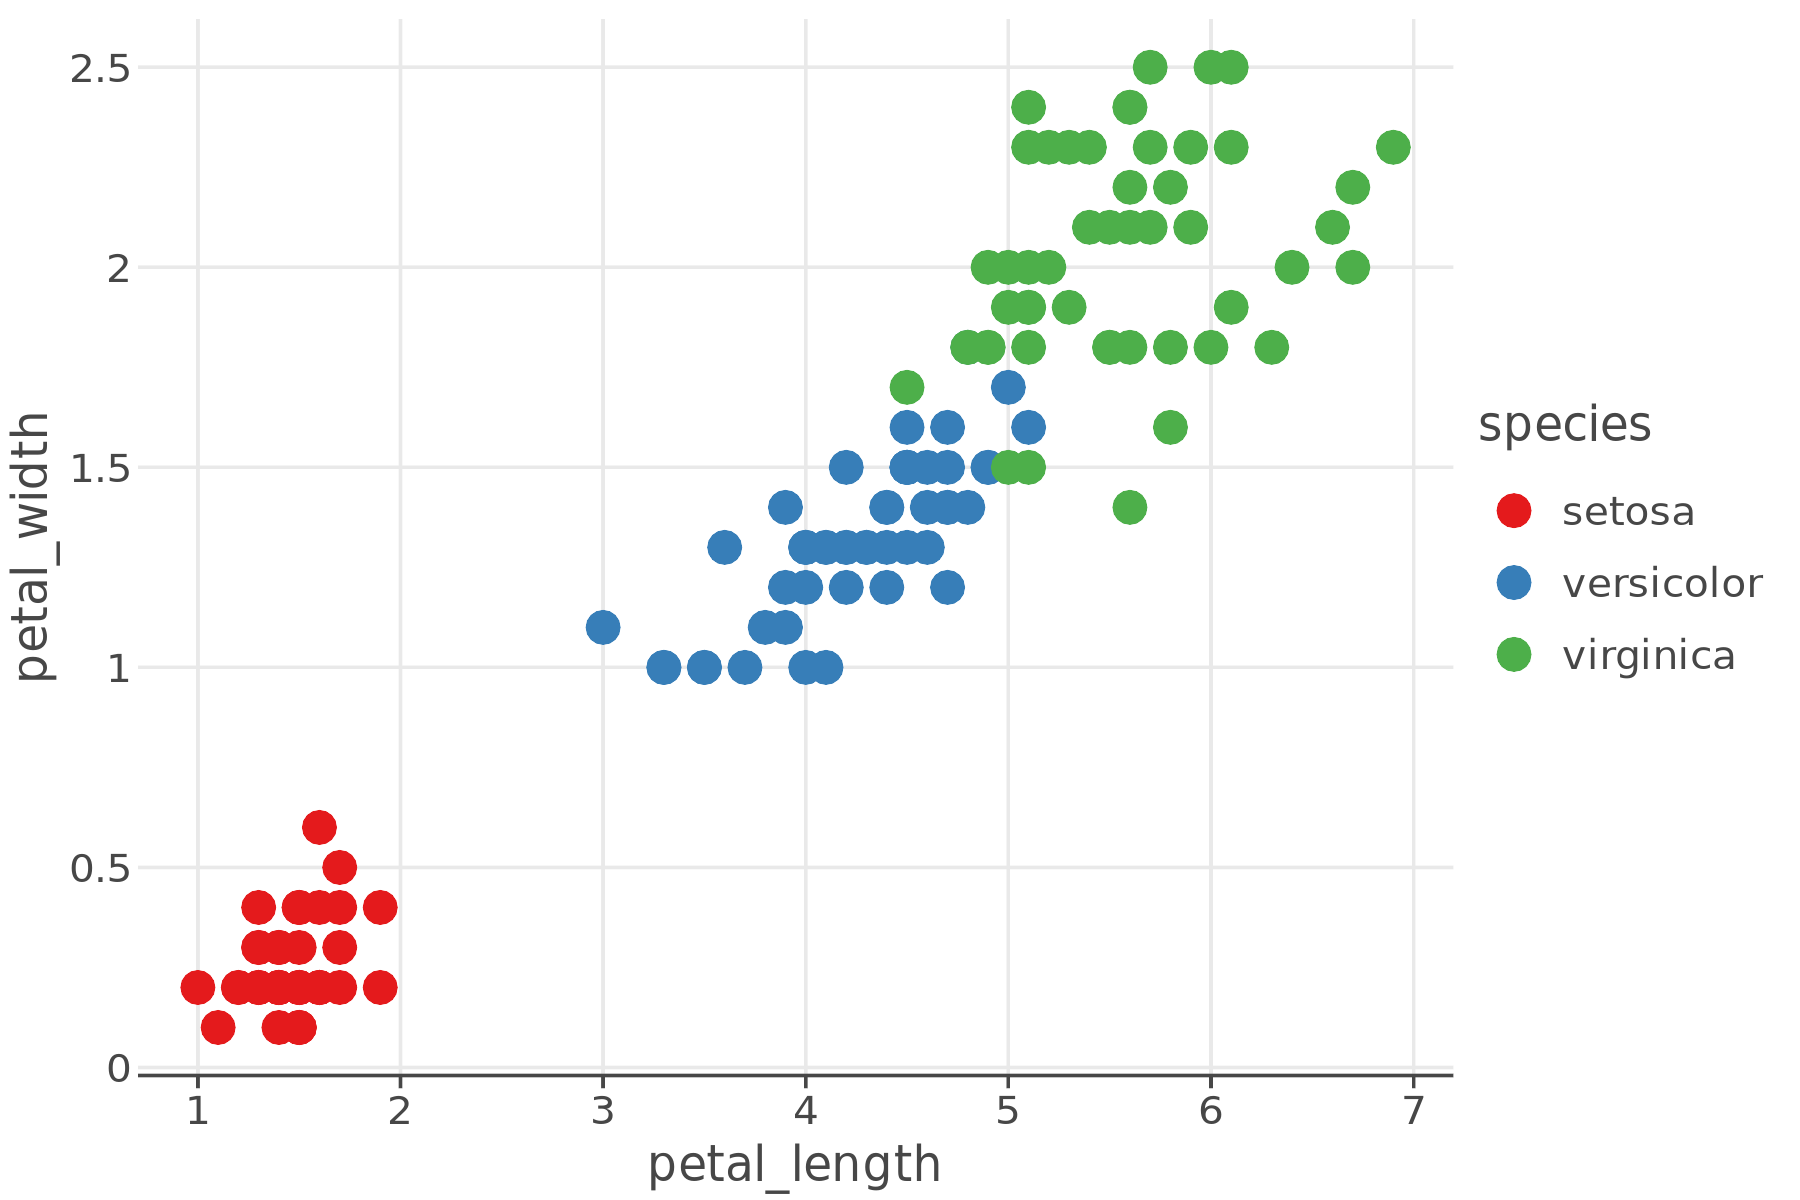

In [28]:
regression_no_dpi = ggsave(p, "regression_no_dpi.png", w=6, h=4, unit='in')
png_to_plot(regression_no_dpi, w=600, h=400)